### Pymaceuticals Analysis

- Overall the quality of the study sample is strong supported by only one subject removed out of 249 initially included
- Additionally, only one possible outlier was identified for the four strongest regimens reviewed (Infubinol)
- Ramicane and Capomulin appeared the two strongest drugs out of the ten included in the test evidenced by their Tumor Size statistics being the two lowest
    *Statistics reviewed were: mean, median, std deviation, variance and SEM
- Ramicane and Capomulin results may have been strengthened by the large sample relative to other regimens
- With r-square of .71, Capomulin subjects appear to have correlation between their weight and average tumor size

### Import dependencies and read in csv files

In [1]:
# import dependencies
# %matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import scipy.stats as st

In [2]:
# read in csv
mouse_file = "../../Downloads/WorkingDirectory/gt-virt-data-pt-12-2021-u-c/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_file = "../../Downloads/WorkingDirectory/gt-virt-data-pt-12-2021-u-c/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Study_results.csv"

mouse_master = pd.read_csv(mouse_file)
study_master = pd.read_csv(study_file)


### Interrogate data and clean

In [3]:
# view mouse columns
mouse_master.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [4]:
# view mouse data
mouse_master.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [5]:
# view study data
study_master.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [6]:
mouse_master.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [7]:
# count number unique mice in the mouse file
mouse_master["Mouse ID"].nunique()

249

In [8]:
study_master.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [9]:
# count number unique mice in the study file
study_master["Mouse ID"].nunique()

249

In [10]:
#calculate the number of null values for each column
print("The number of null values by feature:")

def print_null_msg(df_input, textdf, textfeature, column_output):
    return print(f"{textdf} -- {textfeature}: {df_input[textfeature].isna().sum().sum()}")

print_null_msg(study_master, "study_master", "Timepoint", "null count")
print_null_msg(study_master, "study_master", "Tumor Volume (mm3)", "null count")
print_null_msg(study_master, "study_master", "Metastatic Sites", "null count")
print_null_msg(mouse_master, "mouse_master", "Drug Regimen", "null count")
print_null_msg(mouse_master, "mouse_master", "Sex", "null count")
print_null_msg(mouse_master, "mouse_master", "Age_months", "null count")
print_null_msg(mouse_master, "mouse_master", "Weight (g)", "null count")

The number of null values by feature:
study_master -- Timepoint: 0
study_master -- Tumor Volume (mm3): 0
study_master -- Metastatic Sites: 0
mouse_master -- Drug Regimen: 0
mouse_master -- Sex: 0
mouse_master -- Age_months: 0
mouse_master -- Weight (g): 0


In [11]:
# left merge study to mouse_master, mouse_master, how = "left", on = "Mouse ID")
mouse_combined = pd.merge(mouse_master, study_master, how = "outer", on = "Mouse ID")
mouse_combined.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [12]:
# calculate the number of mice
unique_mice = mouse_combined["Mouse ID"].nunique()
unique_cnt_df = pd.DataFrame([unique_mice]).rename(columns = {0: "Unique Mice"})
unique_cnt_df

Unique Mice
0          249

In [13]:
# id duplicate Mouse ID at Timepoint level
#mouse_combined["tm_str"] = mouse_combined["Timepoint"].astype(str)
mouse_combined["idt_key"] = mouse_combined["Mouse ID"] + (mouse_combined["Timepoint"].astype(str))
keys = mouse_combined["idt_key"].value_counts()
keys_df = pd.DataFrame(keys)
keys_df = keys_df.rename(columns = {"idt_key": "cnt"})
dupkeys_df = keys_df.loc[keys_df["cnt"] > 1, :]
dupkeys_df.reset_index(inplace = True)
dupkeys_df = dupkeys_df.rename(columns = {"index": "idt_key"})
dupkeys_df

idt_key  cnt
0  g98920    2
1  g98915    2
2  g98910    2
3   g9895    2
4   g9890    2

In [14]:
# get all of the data for the duplicate mice, creating a dataframe
duplicate_idt_keys = pd.merge(dupkeys_df, mouse_combined, how = "left", on = "idt_key")
duplicate_mouseid = duplicate_idt_keys["Mouse ID"]
duplicate_mouse = pd.merge(duplicate_mouseid, mouse_combined, how = "left", on = "Mouse ID")
dup_mouseid_val = duplicate_mouse["Mouse ID"][0]
duplicate_mouse_data = mouse_combined.loc[mouse_combined["Mouse ID"] == dup_mouseid_val, :]
duplicate_mouse_data

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites idt_key  
908           45.000000                 0   g9890  
909           45.000000                 0   g9890  
910           48.786801                 0   g9895  
911           47.570392                 0   g9895  
912           51.745156                 0  g98910  
913           49.880528                 0  g98910  
914           51.325852                 1  g98915  
915           53.442020                 0  g98915  
916           55.326122                 1  g98920  
917           54.657650                 1  g98920  
918           56.045564                 1  g98925  
919           59.082294                 1  g98930  
920           62.570880                 2  g98935

In [15]:
# create a dataframe without the duplicates
nondups_df = mouse_combined.loc[mouse_combined["Mouse ID"] != dup_mouseid_val, :]

# test the dup mouse was fully removed from the df
test_df = nondups_df[nondups_df["Mouse ID"] == "g989"]
test_df

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites, idt_key]
Index: []

In [16]:
# count unique mice in clean df
unique_mice_cnt = nondups_df["Mouse ID"].nunique()
unique_mice_cnt_df = pd.DataFrame([unique_mice_cnt]).rename(columns = {0: "Unique Mouse Count"})
unique_mice_cnt_df

Unique Mouse Count
0                 248

### Calculate summary statistics 

In [17]:
# use separate functions to calculate the mean, median, var, std dev, sem
nondups_grp_summary_df = nondups_df.groupby(["Drug Regimen"])
nondups_grp_cnt = nondups_grp_summary_df["Tumor Volume (mm3)"].count()
nondups_grp_cnt_df = pd.DataFrame(nondups_grp_cnt).rename(columns = {"Tumor Volume (mm3)": "Count"})

nondups_grp_mean = nondups_grp_summary_df["Tumor Volume (mm3)"].mean()
nondups_grp_mean_df = pd.DataFrame(nondups_grp_mean).rename(columns = {"Tumor Volume (mm3)": "Tumor Avg"})

nondups_grp_med = nondups_grp_summary_df["Tumor Volume (mm3)"].median()
nondups_grp_med_df = pd.DataFrame(nondups_grp_med).rename(columns = {"Tumor Volume (mm3)": "Tumor Median"})

nondups_grp_var = nondups_grp_summary_df["Tumor Volume (mm3)"].var()
nondups_grp_var_df = pd.DataFrame(nondups_grp_var).rename(columns = {"Tumor Volume (mm3)": "Tumor Variance"})

nondups_grp_std = nondups_grp_summary_df["Tumor Volume (mm3)"].std()
nondups_grp_std_df = pd.DataFrame(nondups_grp_std).rename(columns = {"Tumor Volume (mm3)": "Tumor Std Dev"})

nondups_grp_sem = nondups_grp_summary_df["Tumor Volume (mm3)"].sem()
nondups_grp_sem_df = pd.DataFrame(nondups_grp_sem).rename(columns = {"Tumor Volume (mm3)": "Tumor SEM"})

nondups_combined_df = pd.concat([nondups_grp_cnt_df, nondups_grp_mean_df, nondups_grp_med_df, nondups_grp_var_df, nondups_grp_std_df, nondups_grp_sem_df], axis = 1)
nondups_combined_df

Count  Tumor Avg  Tumor Median  Tumor Variance  Tumor Std Dev  \
Drug Regimen                                                                  
Capomulin       230  40.675741     41.557809       24.947764       4.994774   
Ceftamin        178  52.591172     51.776157       39.290177       6.268188   
Infubinol       178  52.884795     51.820584       43.128684       6.567243   
Ketapril        188  55.235638     53.698743       68.553577       8.279709   
Naftisol        186  54.331565     52.509285       66.173479       8.134708   
Placebo         181  54.033581     52.288934       61.168083       7.821003   
Propriva        148  52.320930     50.446266       43.852013       6.622085   
Ramicane        228  40.216745     40.673236       23.486704       4.846308   
Stelasyn        181  54.233149     52.431737       59.450562       7.710419   
Zoniferol       182  53.236507     51.818479       48.533355       6.966589   

              Tumor SEM  
Drug Regimen             
Capomulin      0.329346  
Ceftamin       0.469821  
Infubinol      0.492236  
Ketapril       0.603860  
Naftisol       0.596466  
Placebo        0.581331  
Propriva       0.544332  
Ramicane       0.320955  
Stelasyn       0.573111  
Zoniferol      0.516398

In [18]:
# use agg function to calculate the mean, median, var, std dev, sem
# use .columns to force rename of columns and the reset the index to flatten from multi index after groupby creates multi index
# calculate std error of the mean: std dev/sq rt(N)
nondups_grp_summary_df = nondups_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["count", "mean", "median", "var", "std", "sem"]})
nondups_grp_summary_df.columns = ["Count", "Tumor Avg", "Tumor Median", "Tumor Variance", "Tumor Std Dev", "Tumor SEM"]
nondups_grp_summary_df.reset_index(inplace = True)
nondups_grp_summary_df.set_index("Drug Regimen", inplace = True)
nondups_grp_summary_df

Count  Tumor Avg  Tumor Median  Tumor Variance  Tumor Std Dev  \
Drug Regimen                                                                  
Capomulin       230  40.675741     41.557809       24.947764       4.994774   
Ceftamin        178  52.591172     51.776157       39.290177       6.268188   
Infubinol       178  52.884795     51.820584       43.128684       6.567243   
Ketapril        188  55.235638     53.698743       68.553577       8.279709   
Naftisol        186  54.331565     52.509285       66.173479       8.134708   
Placebo         181  54.033581     52.288934       61.168083       7.821003   
Propriva        148  52.320930     50.446266       43.852013       6.622085   
Ramicane        228  40.216745     40.673236       23.486704       4.846308   
Stelasyn        181  54.233149     52.431737       59.450562       7.710419   
Zoniferol       182  53.236507     51.818479       48.533355       6.966589   

              Tumor SEM  
Drug Regimen             
Capomulin      0.329346  
Ceftamin       0.469821  
Infubinol      0.492236  
Ketapril       0.603860  
Naftisol       0.596466  
Placebo        0.581331  
Propriva       0.544332  
Ramicane       0.320955  
Stelasyn       0.573111  
Zoniferol      0.516398

In [19]:
# calculate summary overall using agg function, similar to approach calculating at drug regimen level
# clean up df, renaming column header and index label
nondups_totsummary_df = nondups_df.agg({"Tumor Volume (mm3)": ["count", "mean", "median", "var", "std", "sem"]}).transpose()
nondups_totsummary_df.columns = ["Count", "Tumor Avg", "Tumor Median", "Tumor Variance", "Tumor Std Dev", "Tumor SEM"]
nondups_totsummary_df.rename(index = {'Tumor Volume (mm3)': "Drug Regimen Summary"}, inplace = True)
nondups_totsummary_df

Count  Tumor Avg  Tumor Median  Tumor Variance  \
Drug Regimen Summary  1880.0  50.435293     48.933454       79.462907   

                      Tumor Std Dev  Tumor SEM  
Drug Regimen Summary       8.914197   0.205591

In [20]:
# combine both drug regimen and overall summary dfs using append function
nondups_totsummary_combined_df = nondups_grp_summary_df.append(nondups_totsummary_df)
nondups_totsummary_combined_df

Count  Tumor Avg  Tumor Median  Tumor Variance  \
Capomulin              230.0  40.675741     41.557809       24.947764   
Ceftamin               178.0  52.591172     51.776157       39.290177   
Infubinol              178.0  52.884795     51.820584       43.128684   
Ketapril               188.0  55.235638     53.698743       68.553577   
Naftisol               186.0  54.331565     52.509285       66.173479   
Placebo                181.0  54.033581     52.288934       61.168083   
Propriva               148.0  52.320930     50.446266       43.852013   
Ramicane               228.0  40.216745     40.673236       23.486704   
Stelasyn               181.0  54.233149     52.431737       59.450562   
Zoniferol              182.0  53.236507     51.818479       48.533355   
Drug Regimen Summary  1880.0  50.435293     48.933454       79.462907   

                      Tumor Std Dev  Tumor SEM  
Capomulin                  4.994774   0.329346  
Ceftamin                   6.268188   0.469821  
Infubinol                  6.567243   0.492236  
Ketapril                   8.279709   0.603860  
Naftisol                   8.134708   0.596466  
Placebo                    7.821003   0.581331  
Propriva                   6.622085   0.544332  
Ramicane                   4.846308   0.320955  
Stelasyn                   7.710419   0.573111  
Zoniferol                  6.966589   0.516398  
Drug Regimen Summary       8.914197   0.205591

### Create bar charts

In [21]:
nondups_cnt_avg = nondups_grp_summary_df["Count"].mean()
nondups_cnt_avg

nondups_grp_summary_df.sort_values(by = ["Count"], inplace = True, ascending = False,)
nondups_grp_summary_df

Count  Tumor Avg  Tumor Median  Tumor Variance  Tumor Std Dev  \
Drug Regimen                                                                  
Capomulin       230  40.675741     41.557809       24.947764       4.994774   
Ramicane        228  40.216745     40.673236       23.486704       4.846308   
Ketapril        188  55.235638     53.698743       68.553577       8.279709   
Naftisol        186  54.331565     52.509285       66.173479       8.134708   
Zoniferol       182  53.236507     51.818479       48.533355       6.966589   
Placebo         181  54.033581     52.288934       61.168083       7.821003   
Stelasyn        181  54.233149     52.431737       59.450562       7.710419   
Ceftamin        178  52.591172     51.776157       39.290177       6.268188   
Infubinol       178  52.884795     51.820584       43.128684       6.567243   
Propriva        148  52.320930     50.446266       43.852013       6.622085   

              Tumor SEM  
Drug Regimen             
Capomulin      0.329346  
Ramicane       0.320955  
Ketapril       0.603860  
Naftisol       0.596466  
Zoniferol      0.516398  
Placebo        0.581331  
Stelasyn       0.573111  
Ceftamin       0.469821  
Infubinol      0.492236  
Propriva       0.544332

In [22]:
# create bar plot using pandas
nondups_grp_summary_df["Count"].plot(kind = "bar")
x_axis = np.arange(len(nondups_grp_summary_df))
plt.title("# of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(nondups_grp_summary_df["Count"])*1.15)
plt.figtext(0.025, 0.01, "*Note: Pandas used to generate graph.", fontsize=10)
plt.subplots_adjust(bottom=0.30)
plt.hlines(y = nondups_cnt_avg, xmin = 0, xmax = [len(nondups_grp_summary_df) - 1], linestyles = "dashed", colors = "grey")

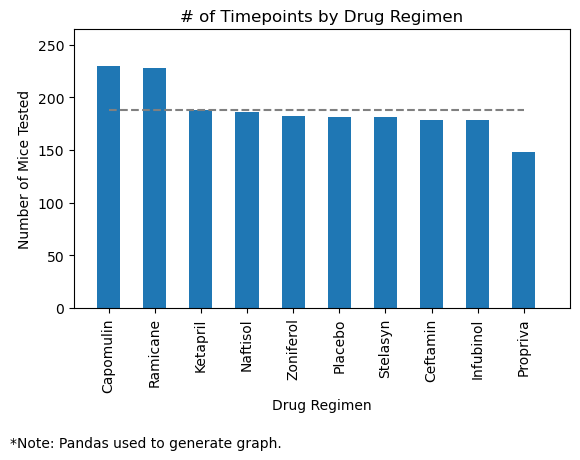

In [23]:
plt.show()
plt.tight_layout()

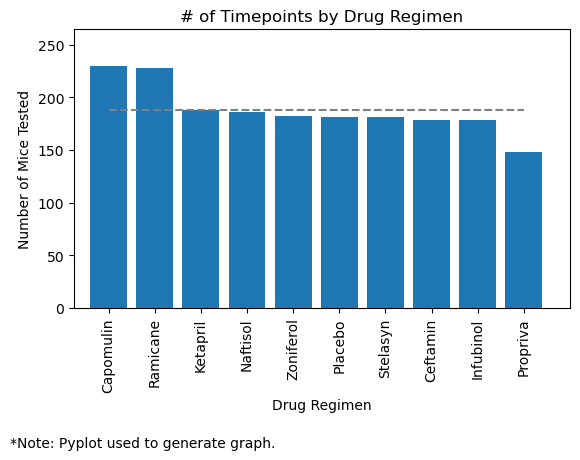

In [24]:
# create bar plot using pyplot
x_axis = np.arange(len(nondups_grp_summary_df))
tick_values = [value for value in x_axis]
plt.bar(x_axis, nondups_grp_summary_df["Count"], align = "center")
plt.xticks(tick_values, nondups_grp_summary_df.index.values, rotation = "vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(nondups_grp_summary_df["Count"])*1.15)
plt.hlines(y = nondups_cnt_avg, xmin = 0, xmax = [len(nondups_grp_summary_df) - 1], linestyles = "dashed", colors = "grey")
plt.title("# of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.figtext(0.025, 0.01, "*Note: Pyplot used to generate graph.", fontsize=10)
plt.subplots_adjust(bottom=0.30)
plt.show()
plt.tight_layout()


### Create pie charts

In [25]:
# create pie graph using pandas
# create df for gender count using groupby
gender_df = nondups_df.groupby(["Sex"])
gender_unique = gender_df["Mouse ID"].nunique()
gender = gender_df["Sex"].count()
gender_unique_df = pd.DataFrame([gender_unique])
gender_unique_pie_df = gender_unique_df.transpose().rename(columns = {"Mouse ID": "Count"})
gender_pie = gender_unique_pie_df.plot(kind = "pie", y = "Count", title = "Distribution of Mice", autopct = "%1.1f%%", legend = None)
plt.ylabel("Sex")
gender_list = pd.DataFrame(gender)
gender_list = gender_list.rename(columns = {"Sex": "Number"})
gender_list.reset_index(inplace = True)
gender_list = gender_list["Sex"].tolist()
gender_list

['Female', 'Male']

<Figure size 640x480 with 0 Axes>

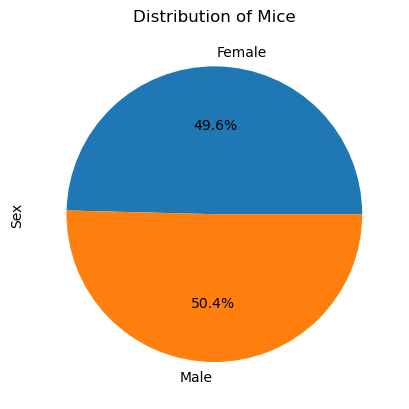

In [26]:
plt.show()

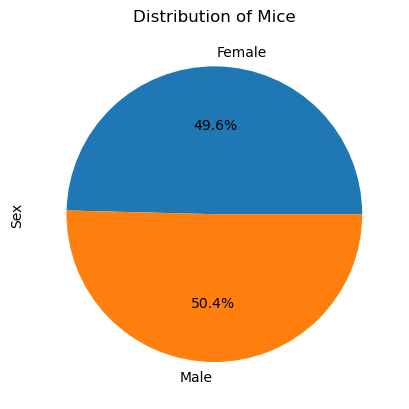

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

In [27]:
# create pie graph using matplotlib
plt.pie(gender_unique_pie_df["Count"], labels = gender_list, autopct = "%1.1f%%")
plt.title("Distribution of Mice")
plt.ylabel("Sex")
#plt.xlabel(gender_unique_pie_df["Sex"])
#plt.legend(loc = "best")
plt.show()
plt.axis("equal")

### Quartiles, Outliers and Boxplots

In [28]:
# create df, limiting to specified drugs
# use groupby by drug and mouse id to id the last timepoint for each mouse
limited_dr_df = nondups_df.loc[nondups_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]), :]
mouse_tp = limited_dr_df.groupby(["Mouse ID", "Drug Regimen"]).max()["Timepoint"]
mouse_tp_df = pd.DataFrame([mouse_tp]).transpose().reset_index()
final_tumor_df = pd.merge(mouse_tp_df, nondups_df, how = "left", on = ["Mouse ID", "Timepoint", "Drug Regimen"])
final_tumor_df

Mouse ID Drug Regimen  Timepoint     Sex  Age_months  Weight (g)  \
0      a203    Infubinol         45  Female          20          23   
1      a251    Infubinol         45  Female          21          25   
2      a275     Ceftamin         45  Female          20          28   
3      a411     Ramicane         45    Male           3          22   
4      a444     Ramicane         45  Female          10          25   
..      ...          ...        ...     ...         ...         ...   
95     y769     Ceftamin         45  Female           6          27   
96     y793    Capomulin         45    Male          17          17   
97     y865     Ceftamin         45    Male          23          26   
98     z578     Ramicane         45    Male          11          16   
99     z581    Infubinol         45  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites idt_key  
0            67.973419                 2  a20345  
1            65.525743                 1  a25145  
2            62.999356                 3  a27545  
3            38.407618                 1  a41145  
4            43.047543                 0  a44445  
..                 ...               ...     ...  
95           68.594745                 4  y76945  
96           31.896238                 2  y79345  
97           64.729837                 3  y86545  
98           30.638696                 0  z57845  
99           62.754451                 3  z58145  

[100 rows x 9 columns]

In [29]:
# create list of unique drug regimens
drug_regimen_list = []
drug_regimen_unique = final_tumor_df["Drug Regimen"].unique()
drug_regimen_df = pd.DataFrame([drug_regimen_unique]).transpose().rename(columns = {0: "Drug Regimen"})
drug_regimen_list = drug_regimen_df["Drug Regimen"].tolist()
drug_regimen_list
#drug_regimen_df

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [30]:
# do for loop based on drug regimens,calculating by drug the quartiles, iqr, upper/lower bounds, and append tumor size to empty lists
quartile_regimen_list = []
quartile_lq_list = []
quartile_uq_list = []
quartile_iqr_list = []
quartile_lb_list = []
quartile_ub_list = []

for x in drug_regimen_list:
    temp_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == x, :]
    temp_qs = temp_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    temp_lq = temp_qs[0.25]
    temp_uq = temp_qs[0.75]
    temp_iqr = temp_uq - temp_lq
    temp_lb = temp_lq - (1.5*temp_iqr)
    temp_ub = temp_uq + (1.5*temp_iqr)
    temp_outliers = temp_df.loc[(temp_df["Tumor Volume (mm3)"] < temp_lb) | (temp_df["Tumor Volume (mm3)"] > temp_ub)]
    quartile_regimen_list.append(x)
    quartile_lq_list.append(temp_lq)
    quartile_uq_list.append(temp_uq)
    quartile_iqr_list.append(temp_iqr)
    quartile_lb_list.append(temp_lb)
    quartile_ub_list.append(temp_ub)
    #print(x, temp_qs, temp_lq, temp_uq, temp_iqr, temp_lb, temp_ub)
quartile_regimen_df = pd.DataFrame(quartile_regimen_list)
quartile_regimen_df = quartile_regimen_df.rename(columns = {0: "Drug Regimen"})

quartile_lq_df = pd.DataFrame(quartile_lq_list)
quartile_lq_df = quartile_lq_df.rename(columns = {0: "LQ"})

quartile_uq_df = pd.DataFrame(quartile_uq_list)
quartile_uq_df = quartile_uq_df.rename(columns = {0: "UQ"})

quartile_iqr_df = pd.DataFrame(quartile_iqr_list)
quartile_iqr_df = quartile_iqr_df.rename(columns = {0: "IQR"})

quartile_lb_df = pd.DataFrame(quartile_lb_list)
quartile_lb_df = quartile_lb_df.rename(columns = {0: "LB"})

quartile_ub_df = pd.DataFrame(quartile_ub_list)
quartile_ub_df = quartile_ub_df.rename(columns = {0: "UB"})

quartile_combined_df = pd.concat([quartile_regimen_df, quartile_lq_df, quartile_uq_df, quartile_iqr_df, quartile_lb_df, quartile_ub_df], axis = 1)
quartile_combined_df


Drug Regimen         LQ         UQ        IQR         LB         UB
0    Infubinol  54.048608  65.525743  11.477135  36.832905  82.741446
1     Ceftamin  48.722078  64.299830  15.577752  25.355450  87.666458
2     Ramicane  31.560470  40.659006   9.098537  17.912664  54.306811
3    Capomulin  32.377357  40.159220   7.781863  20.704562  51.832015

In [31]:
# identify potential outliers
tumor_quartile_df = pd.merge(final_tumor_df, quartile_combined_df, how = "outer", on = "Drug Regimen")
tumor_outlier_df = tumor_quartile_df.loc[(tumor_quartile_df["Tumor Volume (mm3)"] > tumor_quartile_df["UB"]) | (tumor_quartile_df["Tumor Volume (mm3)"] < tumor_quartile_df["LB"])]
tumor_outlier_df

Mouse ID Drug Regimen  Timepoint     Sex  Age_months  Weight (g)  \
5     c326    Infubinol          5  Female          18          25   

   Tumor Volume (mm3)  Metastatic Sites idt_key         LQ         UQ  \
5           36.321346                 0   c3265  54.048608  65.525743   

         IQR         LB         UB  
5  11.477135  36.832905  82.741446

In [32]:
# create list for each regiment with the final tumor volumes

Infubinol = []
Ceftamin = []
Ramicane = []
Capomulin = []

for index, row in final_tumor_df.iterrows():
    if row["Drug Regimen"] == 'Infubinol':
        Infubinol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == 'Ceftamin':
        Ceftamin.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == 'Ramicane':
        Ramicane.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == 'Capomulin':
        Capomulin.append(row["Tumor Volume (mm3)"])

In [41]:
# create box plot formatting possibly outliers in red
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=10,
                  linestyle='--')
fig1, ax1 = plt.subplots()
ax1.boxplot([Infubinol,  Ceftamin,  Ramicane, Capomulin], flierprops = flierprops);
plt.title("Tumor Volume (mm3) by Regimen")
ax1.set_xticklabels(drug_regimen_list)


[Text(1, 0, 'Infubinol'),
 Text(2, 0, 'Ceftamin'),
 Text(3, 0, 'Ramicane'),
 Text(4, 0, 'Capomulin')]

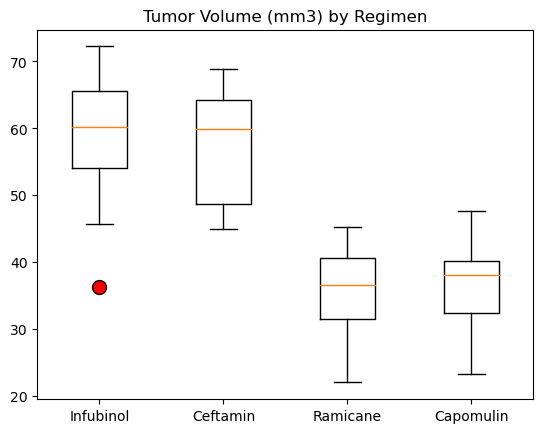

In [42]:
plt.show()

### Line scatter plots

In [35]:
tumor_vol_list = []

for x in drug_regimen_list:
    for index, row in final_tumor_df.iterrows():
        if row["Drug Regimen"] == x:
            tumor_vol_list.append(row["Drug Regimen"])
            tumor_vol_list.append(row["Tumor Volume (mm3)"])
            
            
print(tumor_vol_list)

['Infubinol', 67.97341878, 'Infubinol', 65.52574285, 'Infubinol', 57.03186187, 'Infubinol', 66.08306589, 'Infubinol', 72.2267309, 'Infubinol', 36.3213458, 'Infubinol', 60.96971133, 'Infubinol', 62.43540402, 'Infubinol', 60.91876652, 'Infubinol', 67.28962147, 'Infubinol', 66.19691151, 'Infubinol', 62.11727887, 'Infubinol', 47.01036401, 'Infubinol', 60.16518046, 'Infubinol', 55.62942846, 'Infubinol', 45.69933088, 'Infubinol', 54.65654872, 'Infubinol', 55.65068132, 'Infubinol', 46.25011212, 'Infubinol', 54.04860769, 'Infubinol', 51.54243058, 'Infubinol', 50.00513807, 'Infubinol', 58.26844248, 'Infubinol', 67.68556862, 'Infubinol', 62.75445141, 'Ceftamin', 62.99935619, 'Ceftamin', 45.0, 'Ceftamin', 56.05774909, 'Ceftamin', 55.74282869, 'Ceftamin', 48.72207785, 'Ceftamin', 47.7846818, 'Ceftamin', 61.84902336, 'Ceftamin', 68.92318457, 'Ceftamin', 67.74866174, 'Ceftamin', 57.91838132, 'Ceftamin', 46.78453491, 'Ceftamin', 59.85195552, 'Ceftamin', 64.29983003, 'Ceftamin', 59.74190064, 'Ceftamin

In [36]:
# select particular mouse w/ Capomulin
l509_df = nondups_df[nondups_df["Mouse ID"] == "l509"]
l509_df     

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
371     l509    Capomulin  Male          17          21          0   
372     l509    Capomulin  Male          17          21          5   
373     l509    Capomulin  Male          17          21         10   
374     l509    Capomulin  Male          17          21         15   
375     l509    Capomulin  Male          17          21         20   
376     l509    Capomulin  Male          17          21         25   
377     l509    Capomulin  Male          17          21         30   
378     l509    Capomulin  Male          17          21         35   
379     l509    Capomulin  Male          17          21         40   
380     l509    Capomulin  Male          17          21         45   

     Tumor Volume (mm3)  Metastatic Sites idt_key  
371           45.000000                 0   l5090  
372           45.851193                 0   l5095  
373           46.759074                 0  l50910  
374           47.488599                 1  l50915  
375           48.070452                 2  l50920  
376           44.006257                 2  l50925  
377           44.708055                 2  l50930  
378           40.207288                 2  l50935  
379           40.770813                 2  l50940  
380           41.483008                 3  l50945

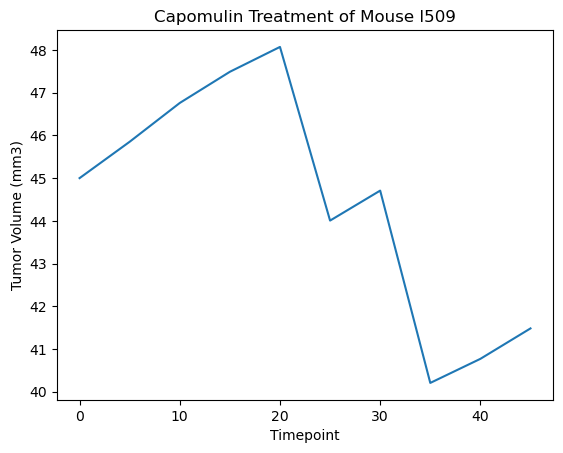

In [37]:
# generate a line plot of its tumor volume by timepoint
plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

In [38]:
# create a df with avg tumor volume and weight for each mouse included in Capomulin regimen

capomulin_df = nondups_df.loc[nondups_df["Drug Regimen"] == "Capomulin", :]
capomulin_grp = capomulin_df.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"]
capomulin_grp_df = pd.DataFrame(capomulin_grp)
capomulin_grp_df.reset_index(inplace = True)
capomulin_grp_df

Mouse ID  Weight (g)  Tumor Volume (mm3)
0      b128          22           41.963636
1      b742          21           40.083699
2      f966          17           36.505973
3      g288          19           41.990097
4      g316          22           44.613344
5      i557          24           44.805810
6      i738          20           39.141053
7      j119          23           44.465236
8      j246          21           43.216925
9      l509          21           44.434474
10     l897          19           42.507261
11     m601          17           34.847470
12     m957          19           39.049816
13     r157          25           45.798970
14     r554          17           36.509212
15     r944          25           43.367364
16     s185          17           34.559143
17     s710          23           42.803733
18     t565          17           39.328725
19     u364          17           39.887495
20     v923          21           41.581595
21     w150          23           41.384825
22     w914          21           41.352452
23     x401          15           36.182040
24     y793          17           38.506829

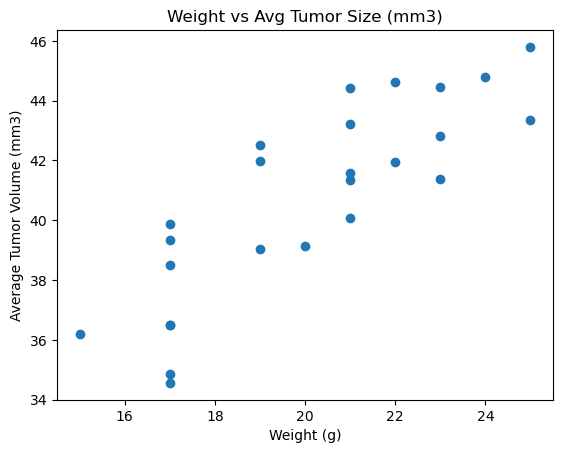

In [39]:
# create scatter plot weight Vs average tumor volume for mice participating in Capomulin regimen
plt.scatter(capomulin_grp_df["Weight (g)"], capomulin_grp_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Avg Tumor Size (mm3)")

plt.show()

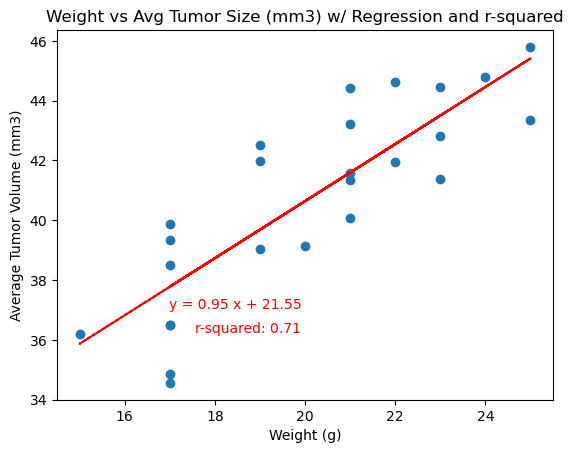

In [40]:
# create scatter plot weight Vs average tumor volume for mice participating in Capomulin regimen
# add linear regression model plot and r2 to the figure
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_grp_df["Weight (g)"], capomulin_grp_df["Tumor Volume (mm3)"])
regress_values = capomulin_grp_df["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
plt.scatter(capomulin_grp_df["Weight (g)"], capomulin_grp_df["Tumor Volume (mm3)"])
plt.plot(capomulin_grp_df["Weight (g)"], regress_values, "r--")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Avg Tumor Size (mm3) w/ Regression and r-squared")
plt.figtext(0.3, 0.3, line_eq, fontsize=10, color = "r")
r2_value = f"r-squared: {round(rvalue**2, 2)}"
plt.figtext(0.34, 0.25, r2_value, fontsize=10, color = "r")
plt.show()